In [1]:
import pandas as pd
# allow multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv("ad_clicks_100k_Treated.csv")

In [3]:
df.drop(columns="Unnamed: 0", inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                100000 non-null  float64
 1   click             100000 non-null  int64  
 2   hour              100000 non-null  object 
 3   C1                100000 non-null  int64  
 4   banner_pos        100000 non-null  int64  
 5   site_id           100000 non-null  object 
 6   site_domain       100000 non-null  object 
 7   site_category     100000 non-null  object 
 8   app_id            100000 non-null  object 
 9   app_domain        100000 non-null  object 
 10  app_category      100000 non-null  object 
 11  device_id         100000 non-null  object 
 12  device_ip         100000 non-null  object 
 13  device_model      100000 non-null  object 
 14  device_type       100000 non-null  int64  
 15  device_conn_type  100000 non-null  int64  
 16  C14               100

## Feature Encoding
- Anonymous categorical features do not need treatment
- WeekDay should be converted to sinozoidal funtion as wekk as hour of day
- For Features with many categories we can do either: mean encoding or normal label encoding

In [5]:
# Get categorical/Object type columns
categorical_cols = [i for i in df.columns.to_list() if df[i].dtype in ['O'] and i not in ['hour', 'weekday']]

### Label Encoding

In [6]:
# label encoding
from sklearn import preprocessing
label_encoding = categorical_cols
encoder = []
for i in label_encoding:
    le = preprocessing.LabelEncoder()
    le.fit(df[i])    
    encoder.append(le)
    df[i] = le.transform(df[i])

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

### Hierarquical Encoding
 - This is not entirely appropriate

In [7]:
from sklearn.preprocessing import OrdinalEncoder
categories = [['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
#Instantiate ordinal encoder
ordinal_encoder = OrdinalEncoder(categories=categories)

#Fit ordinal encoder
ordinal_encoder.fit(df[['weekday']])

# transform the data
df['weekday'] = ordinal_encoder.transform(df[['weekday']])

OrdinalEncoder(categories=[['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                            'Friday', 'Saturday', 'Sunday']])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                100000 non-null  float64
 1   click             100000 non-null  int64  
 2   hour              100000 non-null  object 
 3   C1                100000 non-null  int64  
 4   banner_pos        100000 non-null  int64  
 5   site_id           100000 non-null  int32  
 6   site_domain       100000 non-null  int32  
 7   site_category     100000 non-null  int32  
 8   app_id            100000 non-null  int32  
 9   app_domain        100000 non-null  int32  
 10  app_category      100000 non-null  int32  
 11  device_id         100000 non-null  int32  
 12  device_ip         100000 non-null  int32  
 13  device_model      100000 non-null  int32  
 14  device_type       100000 non-null  int64  
 15  device_conn_type  100000 non-null  int64  
 16  C14               100

In [13]:
# Imports
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Ensemble methods
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

## Balance the Dataset

Columns to drop:
 - `id` Its just a user/interaction idetifier column<br>
 - `hour` We do not need/want this feature as it is already broken down into days, hour_of_day and weekdays<br>
 - `click` Its the target variable<br>
 - `day` It makes no sense to include a variable that depends so greatly on when the data was collected, in this case in October and we have no reason to assume it is a generalizable feature for the remaining days of the year. On the other hand we can reasonable assume that the hour of the day, and the day of the week may have some power over the click rate. <br>

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['id','hour','click', 'day']), 
                                                    df['click'], random_state=0, test_size=0.2)

In [16]:
from imblearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

pipe_1 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=10))
pipe_2 = make_pipeline(StandardScaler(), RandomUnderSampler(replacement=False), KNeighborsClassifier(n_neighbors=10))

In [17]:
from sklearn.metrics import classification_report
pipe_1.fit(X_train, y_train)
pipe_2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=10))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomundersampler', RandomUnderSampler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=10))])

In [21]:
from sklearn.model_selection import cross_validate
scores = cross_validate(pipe_1,
                        X_train, y_train, cv=5,
                        scoring=('roc_auc', 'recall','precision'))
print('ROC AUC is', scores['test_roc_auc'].mean())
print('Recall is ', scores['test_recall'].mean())
print('Precision is', scores['test_precision'].mean())

ROC AUC is 0.6476550369425997
Recall is  0.06097373061030222
Precision is 0.42033550112142526


In [20]:
from sklearn.model_selection import cross_validate
scores = cross_validate(pipe_2,
                        X_train, y_train, cv=5,
                        scoring=('roc_auc', 'recall','precision'))
print('ROC AUC is', scores['test_roc_auc'].mean())
print('Recall is ', scores['test_recall'].mean())
print('Precision is', scores['test_precision'].mean())

ROC AUC is 0.6604815262294638
Recall is  0.5586931830474006
Precision is 0.2533848526448056


In [18]:
print('KNeighborsClassifier Full Sample\n', classification_report(y_test, pipe_1.predict(X_test)))
print('\nKNeighborsClassifier Undersampling Majority Class\n',classification_report(y_test, pipe_2.predict(X_test)))

KNeighborsClassifier Full Sample
               precision    recall  f1-score   support

           0       0.83      0.98      0.90     16565
           1       0.38      0.05      0.09      3435

    accuracy                           0.82     20000
   macro avg       0.61      0.52      0.50     20000
weighted avg       0.76      0.82      0.76     20000


KNeighborsClassifier Undersampling Majority Class
               precision    recall  f1-score   support

           0       0.88      0.66      0.76     16565
           1       0.26      0.57      0.36      3435

    accuracy                           0.65     20000
   macro avg       0.57      0.62      0.56     20000
weighted avg       0.77      0.65      0.69     20000



Text(0.5, 1.0, 'KNeighborsClassifier Full Sample')

Text(0.5, 1.0, 'KNeighborsClassifier Undersampling Majority Class')

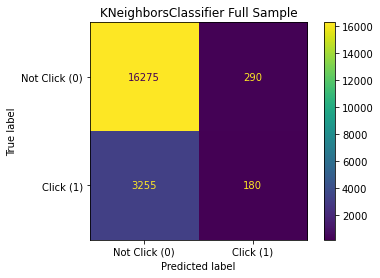

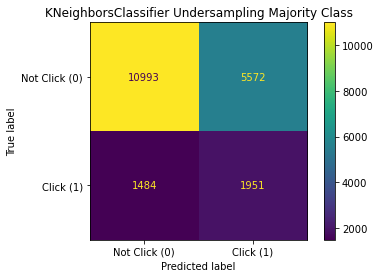

In [22]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(pipe_1, X_test, y_test, display_labels=['Not Click (0)','Click (1)'])
plt.title('KNeighborsClassifier Full Sample')

plot_confusion_matrix(pipe_2, X_test, y_test, display_labels=['Not Click (0)','Click (1)'])
plt.title('KNeighborsClassifier Undersampling Majority Class')

plt.show()

In [23]:
pipe = Pipeline([('sampling', RandomOverSampler()), 
                 ('scaler', StandardScaler()), 
                 ('classifier', KNeighborsClassifier())])
param_grid = [
    {'classifier': [KNeighborsClassifier()], 
     'scaler': [StandardScaler()],
     'sampling': [None, RandomUnderSampler(), RandomOverSampler(), SMOTE()]}, 
    {'classifier': [DecisionTreeClassifier()],
     'scaler': [None],
     'sampling': [None, RandomUnderSampler(), RandomOverSampler(), SMOTE()],
     'classifier__max_depth': [5, 20, 30, 50]}]

grid = GridSearchCV(pipe, param_grid, cv=10, scoring = 'f1')
grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best params:\n{}\n".format(grid.best_params_))

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('sampling', RandomOverSampler()),
                                       ('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid=[{'classifier': [KNeighborsClassifier()],
                          'sampling': [None, RandomUnderSampler(),
                                       RandomOverSampler(), SMOTE()],
                          'scaler': [StandardScaler()]},
                         {'classifier': [DecisionTreeClassifier(max_depth=5)],
                          'classifier__max_depth': [5, 20, 30, 50],
                          'sampling': [None, RandomUnderSampler(),
                                       RandomOverSampler(), SMOTE()],
                          'scaler': [None]}],
             scoring='f1')

Best cross-validation score: 0.36
Best params:
{'classifier': DecisionTreeClassifier(max_depth=5), 'classifier__max_depth': 5, 'sampling': RandomOverSampler(), 'scaler': None}



In [24]:
print('KNeighborsClassifier Full Sample\n', classification_report(y_test, grid.predict(X_test)))

KNeighborsClassifier Full Sample
               precision    recall  f1-score   support

           0       0.90      0.55      0.69     16565
           1       0.25      0.71      0.37      3435

    accuracy                           0.58     20000
   macro avg       0.58      0.63      0.53     20000
weighted avg       0.79      0.58      0.63     20000



Text(0.5, 1.0, 'KNeighborsClassifier Undersampling Majority Class')

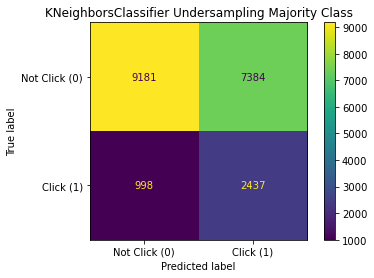

In [25]:
plot_confusion_matrix(grid, X_test, y_test, display_labels=['Not Click (0)','Click (1)'])
plt.title('KNeighborsClassifier Undersampling Majority Class')

plt.show()

## Ensemble Methods

In [27]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [45]:
voting = VotingClassifier(
    [('logreg', LogisticRegression(C=0.001,solver='liblinear', class_weight='balanced')),
     ('tree', DecisionTreeClassifier(max_depth=10, class_weight={0:0.5, 1:1}, random_state=0)),
    ('knn', KNeighborsClassifier(n_neighbors = 5))],
    voting='soft')
voting.fit(X_train, y_train)
lr, tree, knn = voting.estimators_
tree.score(X_test, y_test), lr.score(X_test, y_test), knn.score(X_test, y_test), voting.score(X_test, y_test)

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=0.001,
                                                 class_weight='balanced',
                                                 solver='liblinear')),
                             ('tree',
                              DecisionTreeClassifier(class_weight={0: 0.5,
                                                                   1: 1},
                                                     max_depth=10,
                                                     random_state=0)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

(0.80075, 0.58415, 0.8039, 0.8147)

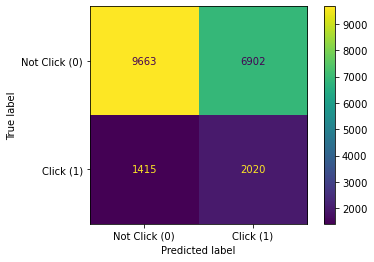

In [46]:
plot_confusion_matrix(lr, X_test, y_test, display_labels=['Not Click (0)','Click (1)'])
# plt.title('KNeighborsClassifier Undersampling Majority Class')

plt.show()

## Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(bootstrap=True, n_estimators=100, random_state=0, oob_score=True, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

RandomForestClassifier(class_weight='balanced', oob_score=True, random_state=0)

In [62]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90     19255
           1       0.09      0.40      0.14       745

    accuracy                           0.82     20000
   macro avg       0.53      0.62      0.52     20000
weighted avg       0.94      0.82      0.87     20000



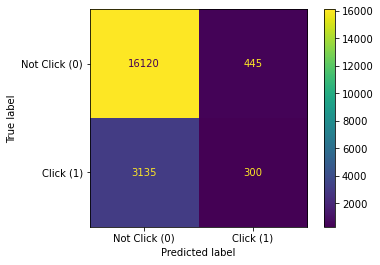

In [63]:
plot_confusion_matrix(model, X_test, y_test, display_labels=['Not Click (0)','Click (1)'])
plt.show()

In [64]:
model.oob_score_

0.821375

In [85]:
feature_importances = {}
for name, score in zip(X_train.columns.to_list(), model.feature_importances_):
    feature_importances[name] = score
feature_importances = pd.DataFrame(feature_importances.values(), index=feature_importances.keys(), columns=['Feature Importances'])

In [109]:
feature_importances.sort_values(by='Feature Importances',ascending=True, inplace=True)

<Figure size 576x432 with 0 Axes>

<BarContainer object of 23 artists>

Text(0.5, 1.0, 'Feature Importances (%)')

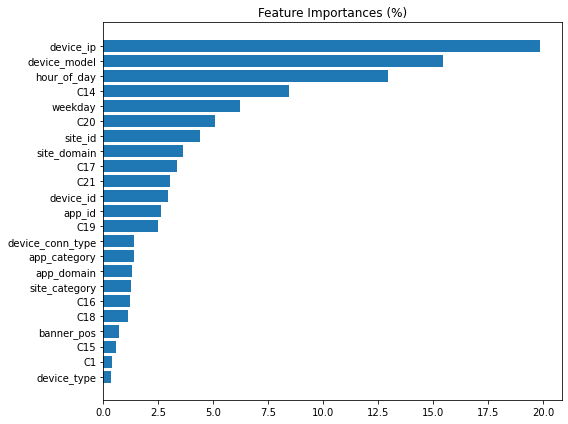

In [112]:
plt.figure(figsize=(8,6))
plt.barh(feature_importances.index, feature_importances['Feature Importances']*100)
plt.title('Feature Importances (%)')
plt.tight_layout()
plt.show()

## Stacking

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

estimators = [
('lr', LogisticRegression(C=0.001,solver='liblinear', class_weight='balanced')),
('forest', RandomForestClassifier(bootstrap=True, n_estimators=100, random_state=0, oob_score=True, class_weight='balanced'))]
    
stacking = StackingClassifier(estimators=estimators, 
                          final_estimator=LogisticRegression(solver='liblinear'))
stacking.fit(X_train, y_train)
lrg, forest = stacking.estimators_
lrg.score(X_test, y_test), forest.score(X_test, y_test),  stacking.score(X_test, y_test)

StackingClassifier(estimators=[('lr',
                                LogisticRegression(C=0.001,
                                                   class_weight='balanced',
                                                   solver='liblinear')),
                               ('forest',
                                RandomForestClassifier(class_weight='balanced',
                                                       oob_score=True,
                                                       random_state=0))],
                   final_estimator=LogisticRegression(solver='liblinear'))

(0.58415, 0.821, 0.8288)

In [117]:
print(classification_report(stacking.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.99      0.83      0.91     19649
           1       0.05      0.52      0.10       351

    accuracy                           0.83     20000
   macro avg       0.52      0.68      0.50     20000
weighted avg       0.97      0.83      0.89     20000



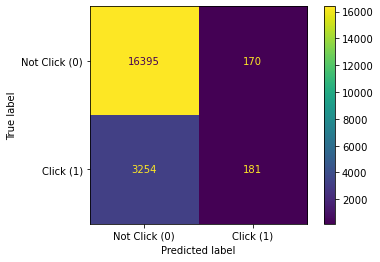

In [118]:
plot_confusion_matrix(stacking, X_test, y_test, display_labels=['Not Click (0)','Click (1)'])
plt.show()

## Experiment with PCA

## Boosting Models

In [ ]:
# Imports
## Adaboost
from sklearn.ensemble import AdaBoostClassifier
## Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
## HistGradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
## XGboost
from xgboost import XGBClassifier
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV

### Adaboost

In [15]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier( DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada.fit(X_train, y_train)
ada_y_pred = ada.predict(X_test)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

#### Adaboost with RandomUnderSampler

In [36]:
ada_ensemble = make_pipeline(RandomUnderSampler(replacement=False), AdaBoostClassifier( DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42))
ada_ensemble.fit(X_train, y_train)
ada_ensemble_y_pred = ada_ensemble.predict(X_test)

Pipeline(steps=[('randomundersampler', RandomUnderSampler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                    learning_rate=0.5, n_estimators=200,
                                    random_state=42))])

In [37]:
scores = cross_validate(ada_ensemble,
                        X_train, y_train, cv=5,
                        scoring=('roc_auc', 'recall','precision','f1'))
print('ROC AUC is', scores['test_roc_auc'].mean())
print('Recall is ', scores['test_recall'].mean())
print('Precision is', scores['test_precision'].mean())

ROC AUC is 0.6904976144161363
Recall is  0.6993960528308418
Precision is 0.2522490460916393


In [38]:
print(classification_report(ada_y_pred, y_test))
print('\nEnsemble Adaboost\n', classification_report(ada_ensemble_y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91     19935
           1       0.01      0.52      0.02        65

    accuracy                           0.83     20000
   macro avg       0.50      0.68      0.46     20000
weighted avg       0.99      0.83      0.90     20000


Ensemble Adaboost
               precision    recall  f1-score   support

           0       0.57      0.90      0.70     10381
           1       0.71      0.25      0.37      9619

    accuracy                           0.59     20000
   macro avg       0.64      0.58      0.53     20000
weighted avg       0.63      0.59      0.54     20000



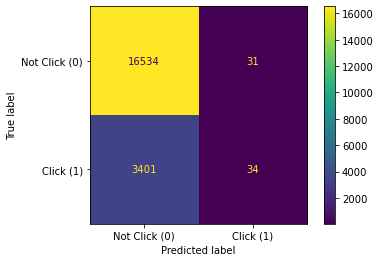

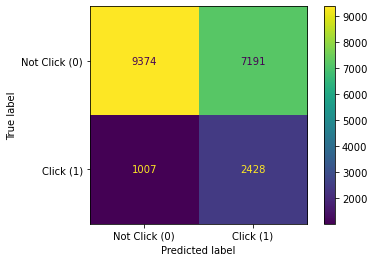

In [39]:
plot_confusion_matrix(ada, X_test, y_test, display_labels=['Not Click (0)','Click (1)'])
plot_confusion_matrix(ada_ensemble, X_test, y_test, display_labels=['Not Click (0)','Click (1)'])

plt.show()

## Gradient Boosting

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

gbrt = GradientBoostingClassifier(random_state=42)
gbrt.fit(X_train, y_train)
gb_y_pred_prob= gbrt.predict_proba(X_test)
gb_y_pred= gbrt.predict(X_test)

GradientBoostingClassifier(random_state=42)

In [23]:
roc_auc_score(y_test, gb_y_pred_prob[:,1]) 

0.7121003887908381

In [25]:
print(classification_report(gb_y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91     19822
           1       0.03      0.60      0.06       178

    accuracy                           0.83     20000
   macro avg       0.51      0.71      0.48     20000
weighted avg       0.99      0.83      0.90     20000



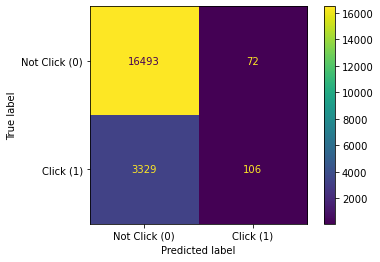

In [26]:
plot_confusion_matrix(gbrt, X_test, y_test, display_labels=['Not Click (0)','Click (1)'])
plt.show()

## HistGradientBoostingClassifier

In [41]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgbr = HistGradientBoostingClassifier()
hgbr.fit(X_train, y_train)
hgbr_y_pred_prob= hgbr.predict_proba(X_test)
hgbr_y_pred = hgbr.predict(X_test)

HistGradientBoostingClassifier()

In [43]:
roc_auc_score(y_test, hgbr_y_pred_prob[:,1]) 

0.7226199115917138

In [44]:
print(classification_report(hgbr_y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91     19795
           1       0.04      0.61      0.07       205

    accuracy                           0.83     20000
   macro avg       0.52      0.72      0.49     20000
weighted avg       0.99      0.83      0.90     20000



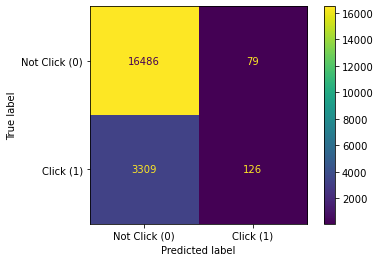

In [45]:
plot_confusion_matrix(hgbr, X_test, y_test, display_labels=['Not Click (0)','Click (1)'])
plt.show()

## XGboost
 - Model Tunning Article: 
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [47]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric="auc")
xgb.fit(X_train, y_train)
xgb_y_pred_prob = xgb.predict_proba(X_test)
xgb_y_pred = xgb.predict(X_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [48]:
roc_auc_score(y_test, y_pred_prob[:,1]) 

0.7193300442744409

In [49]:
print(classification_report(xgb_y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.83      0.91     19622
           1       0.06      0.51      0.10       378

    accuracy                           0.83     20000
   macro avg       0.52      0.67      0.50     20000
weighted avg       0.97      0.83      0.89     20000



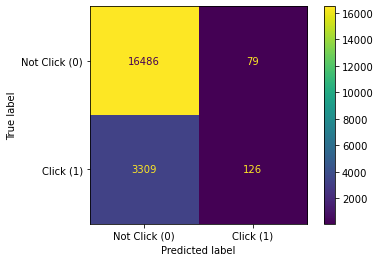

In [50]:
plot_confusion_matrix(hgbr, X_test, y_test, display_labels=['Not Click (0)','Click (1)'])
plt.show()

In [53]:
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV

param_grid= {
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': sp_uniform(loc=0.2, scale=0.8),
        'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
        'colsample_bylevel': sp_uniform(loc=0.4, scale=0.6),
        'min_child_weight': [0.5, 1.0, 3.0, 5.0],
        'gamma': [0, 0.1, 0.25, 0.5, 1.0],
        'reg_lambda': [0, 1e-1, 1, 2, 5, 7, 10],
        'n_estimators': [100,150, 200,300, 400]
        }
xgb = XGBClassifier(use_label_encoder=False, eval_metric="auc")
random_search = RandomizedSearchCV(xgb, param_distributions = param_grid,cv=5,n_iter=20, random_state=42, scoring='roc_auc') 
random_search.fit(X_train, y_train)
xgb_best = random_search.best_estimator_
xgb_best_y_pred = xgb_best.predict(X_test)
xgb_best_y_pred_proba = xgb_best.predict_proba(X_test)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='auc', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None...
                                        'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025866BC3EB0>,
                                        'gamm

In [54]:
roc_auc_score(y_test, xgb_best_y_pred_proba[:,1]) 

0.727097987681187

In [55]:
print(classification_report(xgb_best_y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.83      0.91     19725
           1       0.04      0.56      0.08       275

    accuracy                           0.83     20000
   macro avg       0.52      0.70      0.49     20000
weighted avg       0.98      0.83      0.89     20000



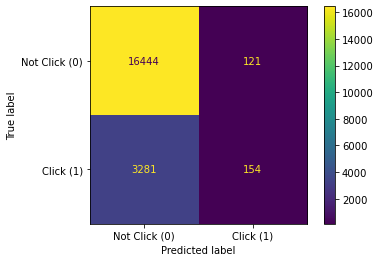

In [56]:
plot_confusion_matrix(xgb_best, X_test, y_test, display_labels=['Not Click (0)','Click (1)'])
plt.show()

## LightGBM 
https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

In [57]:
from lightgbm.sklearn import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
lgbm_y_pred_prob= lgbm.predict_proba(X_test)
lgbm_y_pred = lgbm.predict(X_test)
roc_auc_score(y_test, y_pred_prob[:,1]) 

LGBMClassifier()

0.7193300442744409

In [58]:
print(classification_report(lgbm_y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91     19798
           1       0.04      0.61      0.07       202

    accuracy                           0.83     20000
   macro avg       0.52      0.72      0.49     20000
weighted avg       0.99      0.83      0.90     20000



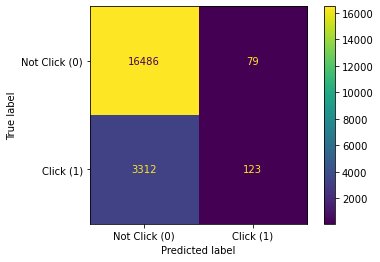

In [59]:
plot_confusion_matrix(lgbm, X_test, y_test, display_labels=['Not Click (0)','Click (1)'])
plt.show()

## Catboost
https://catboost.ai/docs/concepts/about.html

In [60]:
from catboost import CatBoostClassifier
catb = CatBoostClassifier(verbose=False, iterations=100)
catb.fit(X_train, y_train)
catb_y_pred_prob = catb.predict_proba(X_test)
catb_y_pred = catb.predict(X_test)
roc_auc_score(y_test, catb_y_pred_prob[:,1]) 

0.713797773404668

In [61]:
print(classification_report(catb_y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.83      0.91     19632
           1       0.06      0.52      0.10       368

    accuracy                           0.83     20000
   macro avg       0.52      0.68      0.50     20000
weighted avg       0.97      0.83      0.89     20000



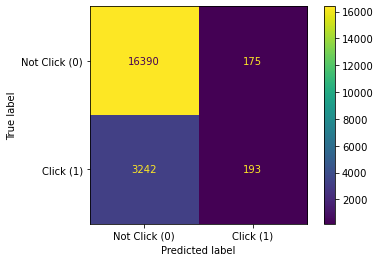

In [62]:
plot_confusion_matrix(catb, X_test, y_test, display_labels=['Not Click (0)','Click (1)'])
plt.show()

In [63]:
param_grid= {'learning_rate': [0.1,0.05,0.03,0.01],
        'depth': [3, 5,7],
        'l2_leaf_reg': [1, 3, 5, 7, 9] }
random_search = RandomizedSearchCV(CatBoostClassifier(verbose=False,iterations=100), param_distributions = param_grid,cv=5,n_iter=10, random_state=42, scoring='roc_auc') 
random_search.fit(X_train, y_train)
cat_best = random_search.best_estimator_
cat_best_y_pred = cat_best.predict(X_test)
cat_best_y_pred_proba = cat_best.predict_proba(X_test)

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x00000258004E0BE0>,
                   param_distributions={'depth': [3, 5, 7],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.1, 0.05, 0.03,
                                                          0.01]},
                   random_state=42, scoring='roc_auc')

In [64]:
print(classification_report(cat_best_y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.83      0.91     19798
           1       0.03      0.59      0.07       202

    accuracy                           0.83     20000
   macro avg       0.51      0.71      0.49     20000
weighted avg       0.99      0.83      0.90     20000



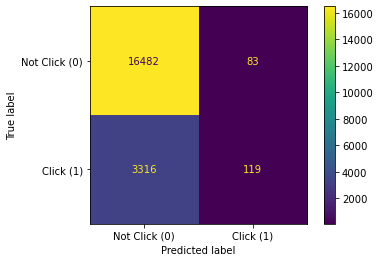

In [65]:
plot_confusion_matrix(cat_best, X_test, y_test, display_labels=['Not Click (0)','Click (1)'])
plt.show()

# Preprocessing with Pipeline

https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# allow multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [11]:
# Load the Treated Dataset
df = pd.read_csv("ad_clicks_100k_Treated.csv")
df.drop(columns="Unnamed: 0", inplace=True)

### Drop features that will not go into the model
- `id`, `hour` (because hour was broken down into (day, weekday, hour_of_day)), `day` (because we find that it will add no significant predictive value that makes sense in any future application, i.e. the dataset covers 10 days of the year and we have no way to know if any of those days is representative of the year, or if there was something exceptional happening. By using `hour_of_day` and `weekday` we average these values and thus make this possible effect less significant)   

In [13]:
categorical_columns = [i for i in list(df.columns) if df[i].dtypes in ["O"] and i not in ['id','hour','day']]
numerical_columns = [i for i in list(df.columns) if df[i].dtypes not in ["O"] and i not in ['id','hour','day']]

X = df[categorical_columns + numerical_columns]
y = df['click']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
# Mean Encoding for high cardinality categorical features
# One hot encoding for low cardinality categorical features
# PCA to reduce dimensionality?
# Balance Dataset


In [ ]:
categorical_encoder = OneHotEncoder(handle_unknown='ignore')
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessing = ColumnTransformer(
    [('cat', categorical_encoder, categorical_columns),
     ('num', numerical_pipe, numerical_columns)])

rf = Pipeline([
    ('preprocess', preprocessing),
    ('classifier', RandomForestClassifier(random_state=42))
])
rf.fit(X_train, y_train)